In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, Birch, DBSCAN, MiniBatchKMeans, MeanShift, OPTICS
import seaborn as sns

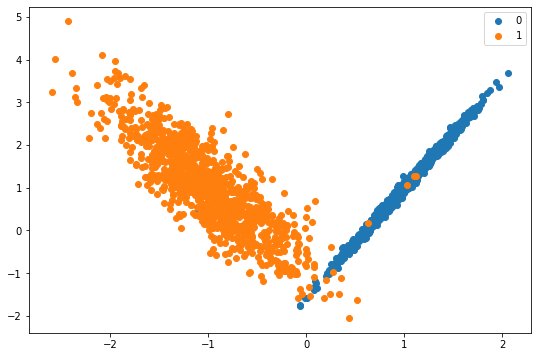

In [2]:
# 创建测试数据集
data, labels = make_classification(n_samples=2000, n_classes=2, n_features=2,
                                   n_informative=2, random_state=1, n_redundant=0, n_clusters_per_class=1)

plt.figure(figsize=(9, 6))

for label in range(2):
    rows = np.where(labels == label)
    plt.scatter(x=data[rows, 0], y=data[rows, 1], label=label)

plt.legend()

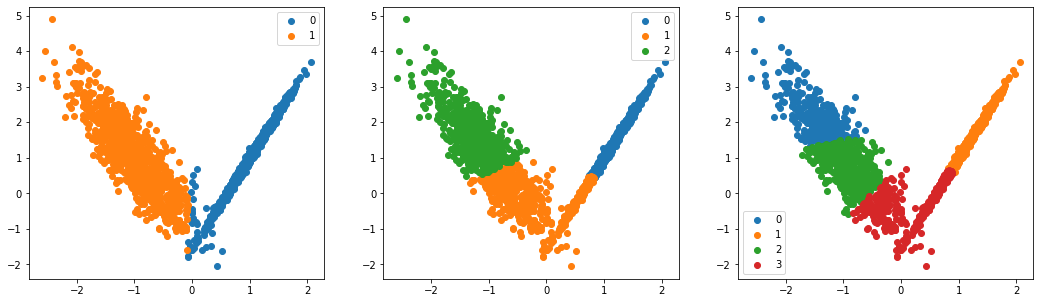

In [3]:
'''
K-Means聚类

'''


def Kmeans(data):
    fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18, 5))

    i = 0

    for k in range(2, 5):
        model = KMeans(n_clusters=k)
        model.fit(data)

        labels = model.predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i].scatter(data[rows, 0], data[rows, 1], label=str(l))

        ax[i].legend()

        i += 1


Kmeans(data)

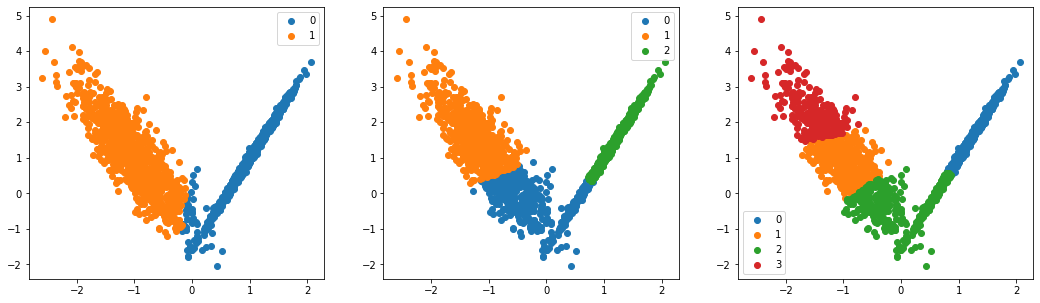

In [4]:
'''
MiniBatchKMeans
'''


def miniBatchKmeans(data):
    fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18,5))

    i = 0

    for k in range(2, 5):
        model = MiniBatchKMeans(n_clusters=k)
        model.fit(data)

        labels = model.predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i].scatter(data[rows, 0], data[rows, 1], label=str(l))

        ax[i].legend()

        i += 1


miniBatchKmeans(data)

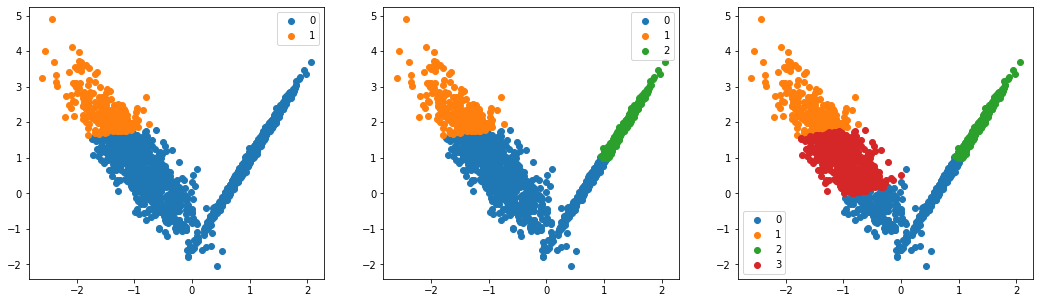

In [5]:
'''
BIRCH聚类
'''


def birch(data):
    fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18, 5))

    i = 0

    for k in range(2, 5):
        model = Birch(n_clusters=k)
        model.fit(data)

        labels = model.predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i].scatter(data[rows, 0], data[rows, 1], label=str(l))

        ax[i].legend()

        i += 1


birch(data)

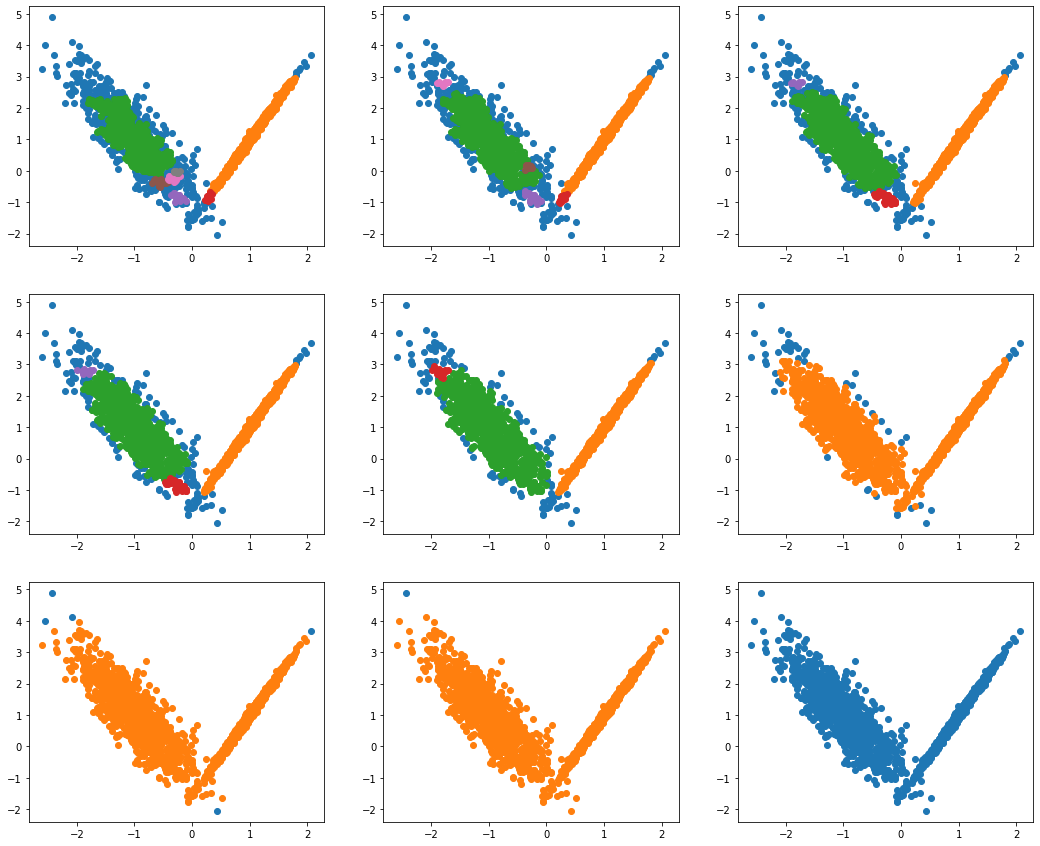

In [7]:
'''
DBSCAN聚类
'''


def dbscan_eps(data):
    fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(18, 15))

    eps = [0.1, 0.11, 0.12, 0.13, 0.15, 0.2, 0.4, 0.7, 1.0]
    i, j = 0, 0

    for e in eps:
        model = DBSCAN(eps=e, min_samples=10)

        labels = model.fit_predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i][j].scatter(data[rows, 0], data[rows, 1])

        if j == 2:
            i += 1
            j = 0
        else:
            j += 1


dbscan_eps(data)

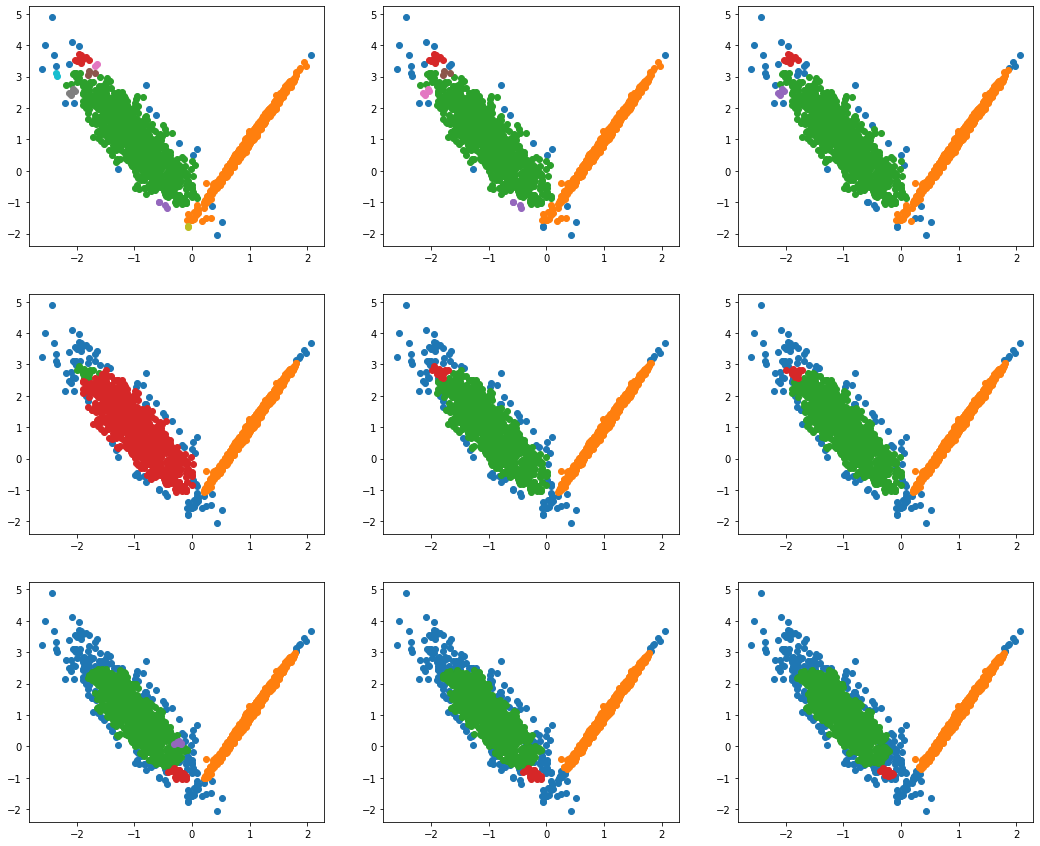

In [8]:
'''
DBSCAN聚类
'''


def dbscan_sample(data):
    fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(18, 15))

    samples = [2, 3, 4, 9, 10, 11, 16, 17, 18]
    i, j = 0, 0

    for s in samples:
        model = DBSCAN(eps=0.15, min_samples=s)

        labels = model.fit_predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i][j].scatter(data[rows, 0], data[rows, 1])

        if j == 2:
            i += 1
            j = 0
        else:
            j += 1


dbscan_sample(data)

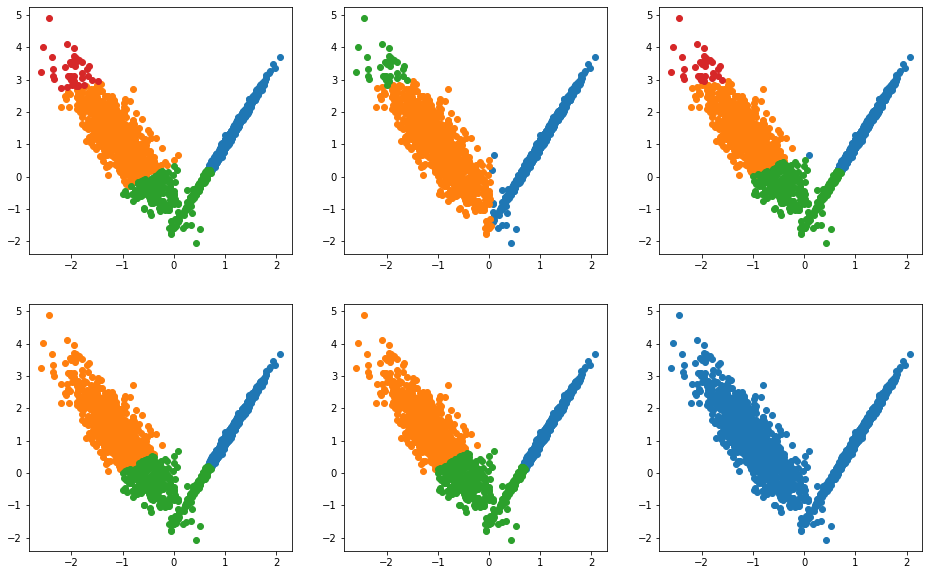

In [9]:
'''
MeanShift聚类
'''


def meanShift(data):
    fig, ax = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(16, 10))

    width = [0.5, 0.7, 0.8, 0.9, 1.0, 2.0]
    i, j = 0, 0

    for w in width:
        model = MeanShift(bandwidth=w)

        labels = model.fit_predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i][j].scatter(data[rows, 0], data[rows, 1])

        if j == 2:
            i += 1
            j = 0
        else:
            j += 1


meanShift(data)

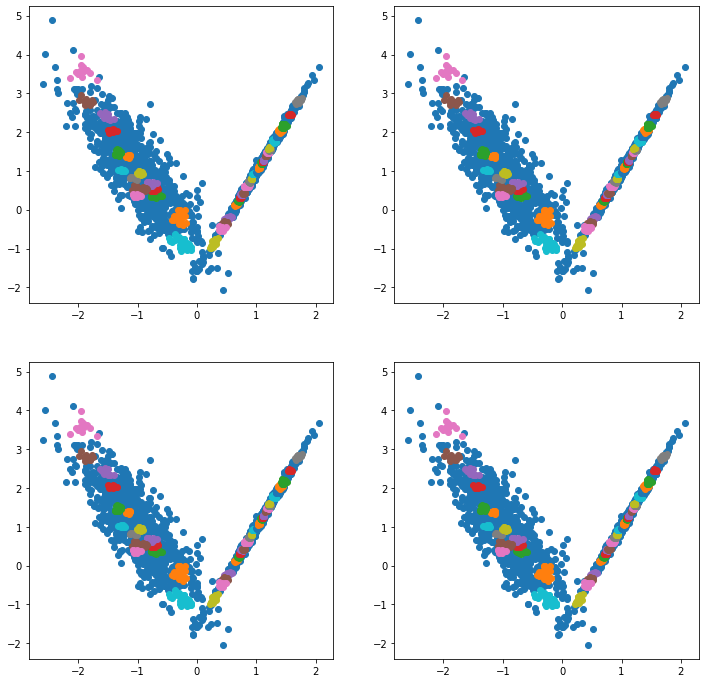

In [10]:
'''
OPTICS聚类
'''


def optics_eps(data):
    fig, ax = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(12, 12))

    eps = [0.2, 0.45, 0.75, 1.0]
    i, j = 0, 0

    for e in eps:
        model = OPTICS(eps=e, min_samples=9)

        labels = model.fit_predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i][j].scatter(data[rows, 0], data[rows, 1])

        if j == 1:
            i += 1
            j = 0
        else:
            j += 1


optics_eps(data)

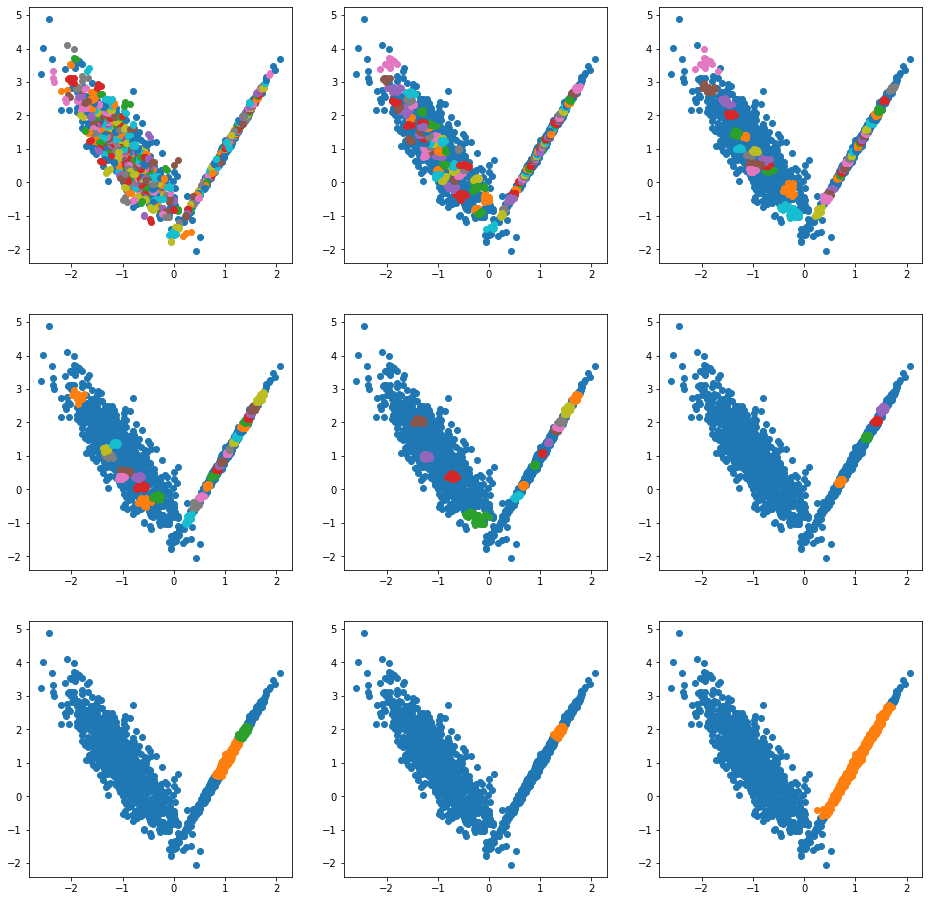

In [12]:
def optics_sample(data):
    fig, ax = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(16, 16))

    samples = [2, 5, 9, 11, 15, 30, 50, 70, 90]
    i, j = 0, 0

    for s in samples:
        model = OPTICS(eps=0.7, min_samples=s)

        labels = model.fit_predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i][j].scatter(data[rows, 0], data[rows, 1])

        if j == 2:
            i += 1
            j = 0
        else:
            j += 1


optics_sample(data)

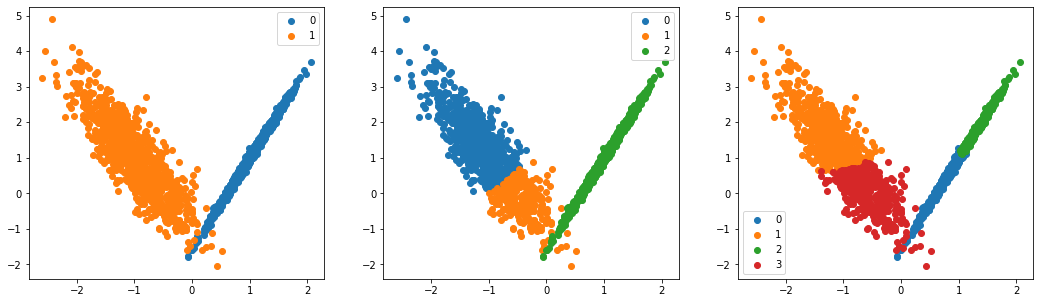

In [13]:
from sklearn.mixture import GaussianMixture



'''
高斯混合模型
'''


def gaussCluster(data):
    fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(18, 5))

    i = 0

    for k in range(2, 5):
        model = GaussianMixture(n_components=k)
        model.fit(data)

        labels = model.predict(data)
        label_pred = np.unique(labels)

        for l in label_pred:
            rows = np.where(labels == l)
            ax[i].scatter(data[rows, 0], data[rows, 1], label=str(l))

        ax[i].legend()

        i += 1
        
gaussCluster(data)